## import Dependencies

In [6]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action='ignore', category=Warning)

## Loading Data

In [7]:
data = np.load('mnist.npz')

In [8]:
X = data['X']
y = data['y']
X = X.T
X.shape

(60000, 784)

In [9]:
y = y.T
y.shape

(60000, 1)

label =  0


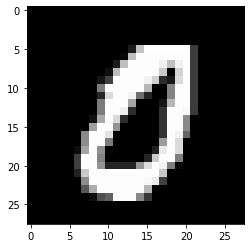

In [13]:
print(f"label =  {int(y[10][0])}")
plt.imshow(X[10].reshape(28,28),cmap='gray')

## Pre Processing and Data Splitting

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


label = 2


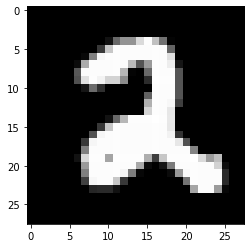

In [31]:
plt.imshow(X_train[100].reshape(28,28),cmap='gray')
print(f"label = {int(y_train[100][0])}")

label = 2


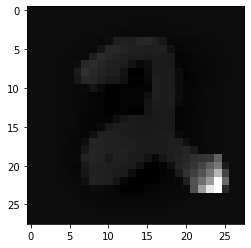

In [29]:
plt.imshow(X_train_scaled[100].reshape(28,28),cmap='gray')
print(f"label = {int(y_train[100][0])}")

## Train KNN Model for 10 Classes 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_train =[]
acc_test = []
for i in range(1,10):
    Knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled,y_train)
    y_pred_train = Knn.predict(X_train_scaled)
    y_pred_test = Knn.predict(X_test_scaled)
    acc_train.append(accuracy_score(y_pred_train , y_train))
    acc_test.append(accuracy_score(y_pred_test , y_test))


## Plotting KNN Results

best score with n = 1


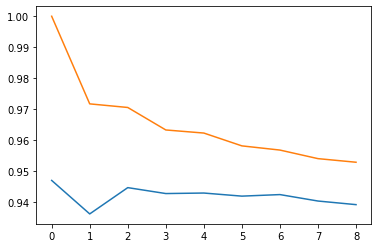

In [34]:
plt.plot(acc_test)
plt.plot(acc_train)
print(f"best score with n = {np.argmax(acc_test)+1}")

## Use SVM to Train Model on Our Data 

First We Need To Figure Out How To Do it For Two classes (Eg. 7 and 3)
Then We Can Train 45 SVM's and Test It <br> By Giving All SVM's Test Data And Vote Among All Of Them

### Import Dependencies 

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [42]:
seven_indexes = np.where(y_train ==7)[0]
three_indexes = np.where(y_train == 3)[0]

In [43]:
X_new = np.concatenate((X[seven_indexes] , X[three_indexes]) , axis=0)
y_new = np.concatenate((y[seven_indexes] , y[three_indexes]), axis=0)

In [46]:
y_new = y_new.reshape(-1 ,)

In [47]:
X_train_new , X_test_new , y_train_new , y_test_new = train_test_split(X_new , y_new , test_size=0.2)

### Train Our Model 

In [48]:
sv = SVC()
sv.fit(X_train_new,y_train_new)

SVC()

### Testing Accuracy Using K-Fold Cross Validation Method 

In [49]:
cv = KFold(n_splits=4 , random_state= 1 , shuffle=True)
scores = cross_val_score(sv , X_new , y_new ,scoring='accuracy', cv=cv )
print(f"Mean score on all folds {np.mean(scores):.2f}")

Mean score on all folds 0.97


#### Train 45 SVM's And Store Them in a 2D Array

In [50]:
svms = np.zeros((10,10),dtype=SVC)
accs = []
for i in range(10):
    for j in range(i+1,10):
        if i != j :
            i_indexes = np.where(y_train ==i)[0]
            j_indexes = np.where(y_train == j)[0]
            
            X_new_temp = np.concatenate((X[i_indexes] , X[j_indexes]) , axis=0)
            y_new_temp = np.concatenate((y[i_indexes] , y[j_indexes]), axis=0)
            
            X_train_new_temp , X_test_new_temp , y_train_new_temp , y_test_new_temp = train_test_split(X_new_temp , y_new_temp , test_size=0.2)
            # globals()[f"svm_{i}_{j}"] = SVC().fit(X_train_new_temp , y_train_new_temp)
            sv_temp = SVC().fit(X_train_new_temp, y_train_new_temp)
            
            y_pred_new_temp = sv_temp.predict(X_test_new_temp)
            svms[i][j] = sv_temp
            accs.append(accuracy_score(y_pred_new_temp,y_test_new_temp))    



In [51]:
svms

array([[0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, SVC(), SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, SVC(), SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, SVC(), SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, 0, SVC(), SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, 0, 0, SVC(), SVC()],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, SVC()],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

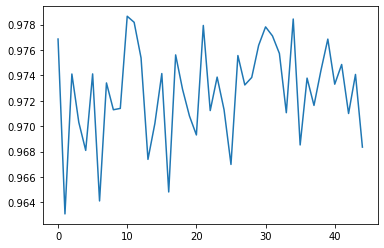

In [52]:
plt.plot(accs)

In [54]:
np.argmin(accs)
# 0 1 is the hardest 

1

predict = 5
label = 5


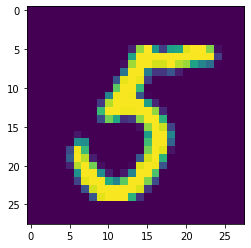

In [67]:
i = np.random.randint(1,60000)
x_sample = X[i]
label = y[i]

y_pred = []
for i in range(10):
    for j in range(i+1 ,10):
        if i!=j : 
            y_pred.append(svms[i][j].predict([x_sample]))

y_pred = np.ravel(y_pred)
y_pred = y_pred.astype('int64')
bincount = np.bincount(y_pred)
print(f"predict = {np.argmax(bincount)}")            
print(f"label = {int(label[0])}")
plt.imshow(x_sample.reshape(28,28))